In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DataSets

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=10000,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

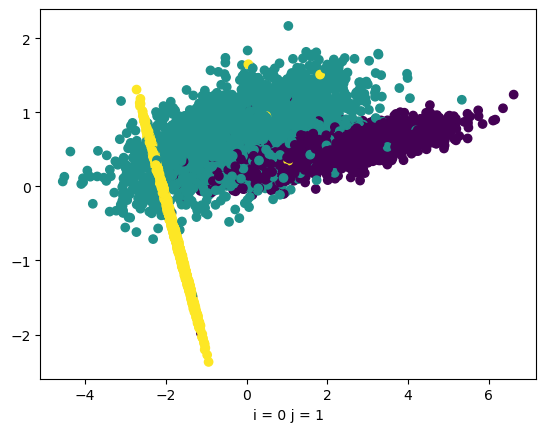

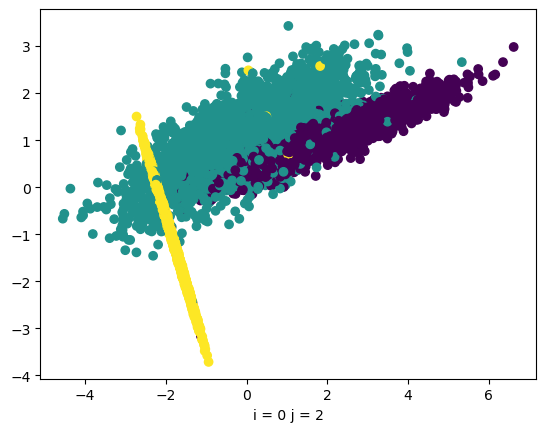

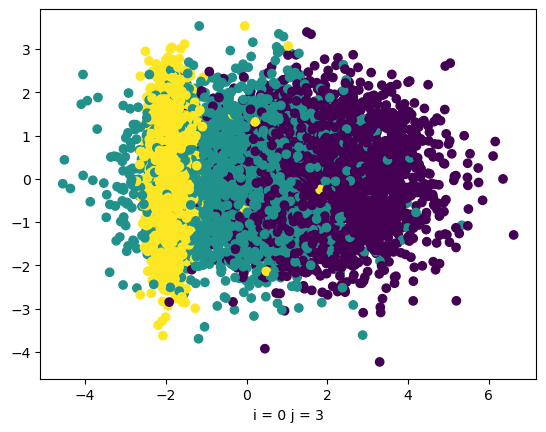

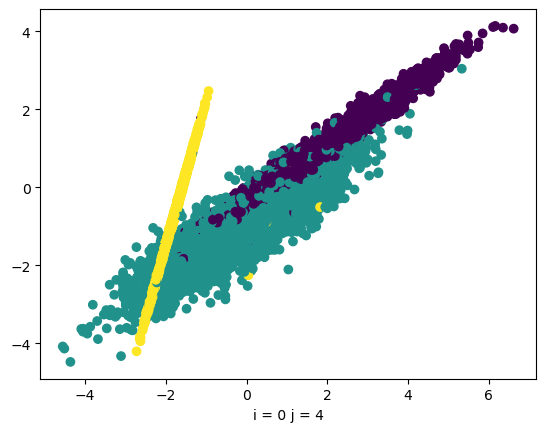

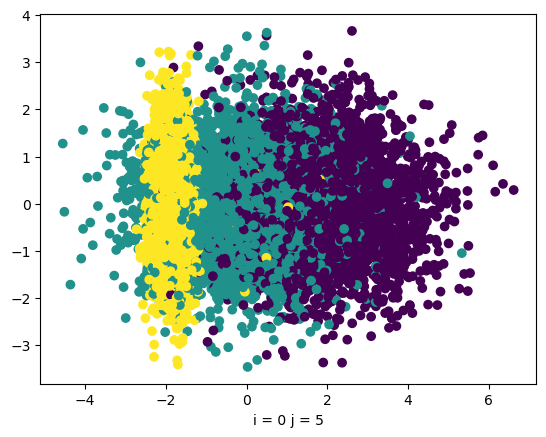

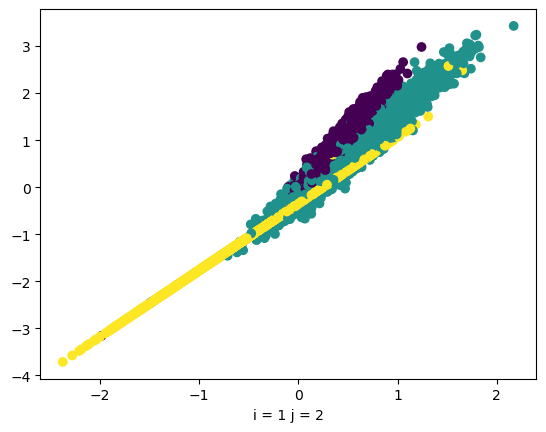

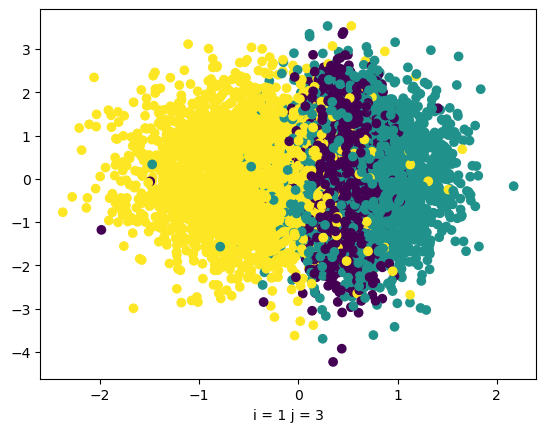

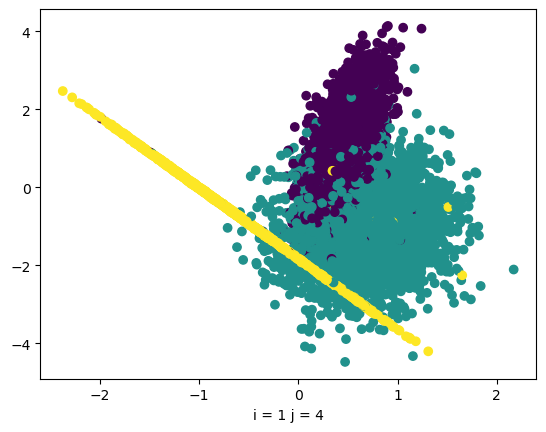

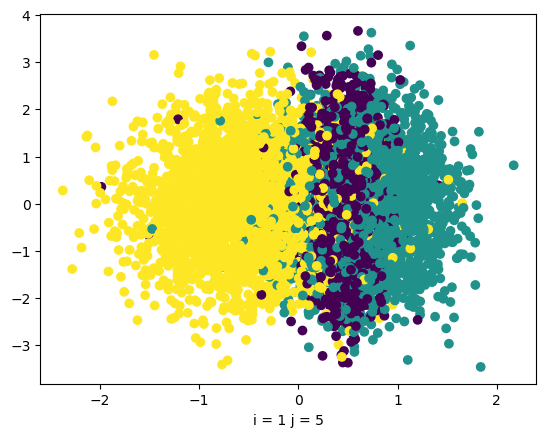

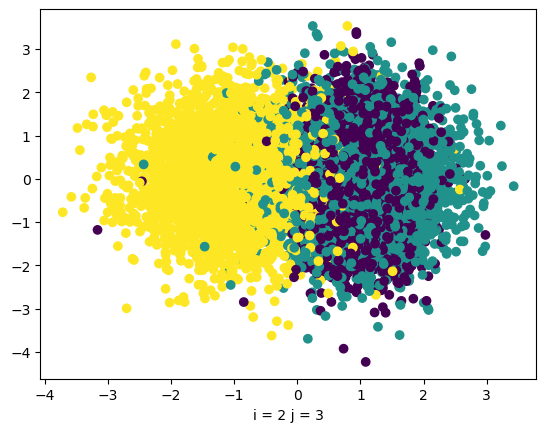

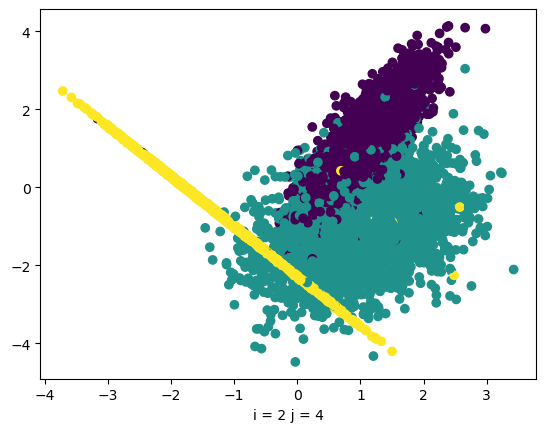

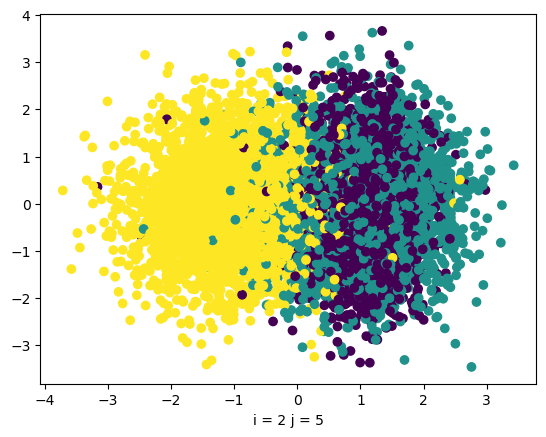

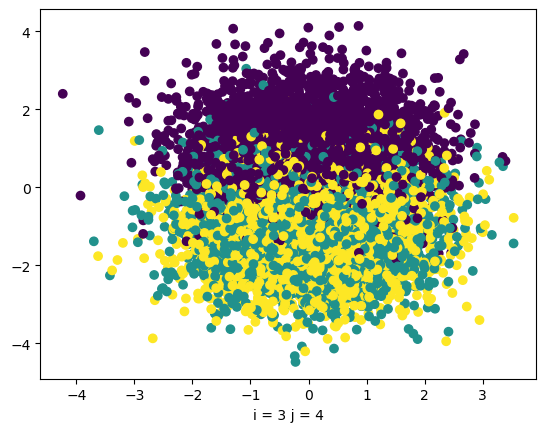

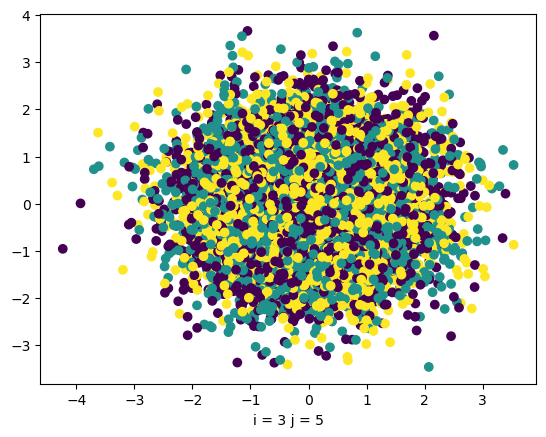

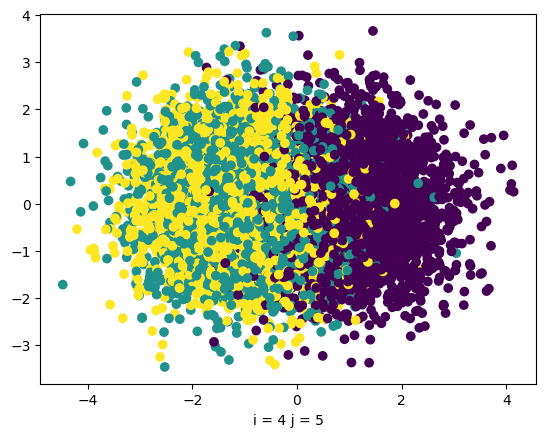

In [3]:

for i in range(6):
    for j in range(i+1, 6, 1):
        plt.scatter(X[:, i], X[:, j], c=y)
        plt.xlabel(f"i = {i} j = {j}")
        plt.show()
    



# K_Fold Cross Validation 

In [4]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=41)
kfold.get_n_splits(X, y)
accuracies = []
normal_accuracies = []

# Gaussian Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [6]:
from sklearn.metrics import accuracy_score
for train_idx, test_idx in kfold.split(X,y):
    X_trian = X[train_idx, :]
    y_trian = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    
    model.fit(X_trian, y_trian)
    
    y_hat = model.predict(X_test)
    
    accuracy = accuracy_score(y_hat, y_test)
    accuracies.append(accuracy)

In [7]:
accuracies

[0.871, 0.854, 0.859, 0.87, 0.872, 0.866, 0.873, 0.855, 0.87, 0.863]

In [8]:
#convert list to ndarray
accuracies = np.asanyarray(accuracies)
mean_accuracy = np.mean(accuracies)
mean_accuracy

0.8653000000000001

# Gaussian Naive Bayes with Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [10]:
from sklearn.metrics import accuracy_score
for train_idx, test_idx in kfold.split(X,y):
    X_trian = X[train_idx, :]
    y_trian = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    
    X_trian = scaler.fit_transform(X_trian)
    X_test = scaler.transform(X_test)
    model.fit(X_trian, y_trian)
    
    y_hat = model.predict(X_test)
    
    accuracy_normal = accuracy_score(y_hat, y_test)
    normal_accuracies.append(accuracy)

In [11]:
normal_accuracies

[0.863, 0.863, 0.863, 0.863, 0.863, 0.863, 0.863, 0.863, 0.863, 0.863]

In [12]:
#convert list to ndarray
normal_accuracies = np.asanyarray(normal_accuracies)
normal_mean_accuracy = np.mean(normal_accuracies)
normal_mean_accuracy

0.8629999999999999

# cross_val_score

In [13]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X, y, cv=kfold)
score

array([0.871, 0.854, 0.859, 0.87 , 0.872, 0.866, 0.873, 0.855, 0.87 ,
       0.863])

In [14]:
mean_accuracy = np.mean(score)
mean_accuracy

0.8653000000000001


# cross_val_score  and Normaization with pipeline

In [15]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', scaler), ('model', model)])
cv = KFold(n_splits=10, shuffle=True, random_state=41)

normal_score = cross_val_score(pipe, X, y, cv=cv)
normal_score

array([0.871, 0.854, 0.859, 0.87 , 0.872, 0.866, 0.873, 0.855, 0.87 ,
       0.863])

In [16]:
normal_mean_accuracy = np.mean(normal_score)
normal_mean_accuracy

0.8653000000000001